In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(os.getcwd())
os.chdir('/content/drive/My Drive/1006')
print(os.getcwd())

/content
/content/drive/My Drive/1006


In [3]:
import pandas as pd
import numpy as np
import taddy
import time

In [ ]:
!pip install import-ipynb

importing Jupyter notebook from SelectIndices.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/1006
/content/drive/My Drive/1006
     |████████████████████████████████| 51kB 3.1MB/s 
  Created wheel for fast-pytorch-kmeans: filename=fast_pytorch_kmeans-0.1.6-cp37-none-any.whl size=7088 sha256=3bb3db840f58105fed235ab38a4b7ed72743c764d22bd463b207424192690209
  Stored in directory: /root/.cache/pip/wheels/bc/fc/2f/c4a16a2578591451fa497f455a1ec95431303421656c76c699
Successfully built fast-pytorch-kmeans
(80, 80)
[ 5 71 47 46 61 43 34 69 10 58 28  8 14]


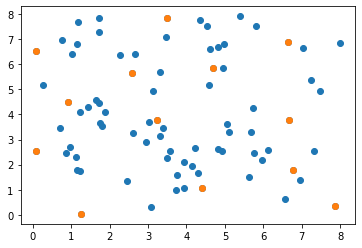

In [ ]:
import import_ipynb
import SelectIndices as si

In [4]:
dataset_names = ['eo']
embed_types = ['cvec_pca16', 'cvec_nmf16', 'cvec_umap16', 'cvec_tsne16', 'bert', 'roberta', 'distil', 'glove6B', 'universal']
counts = [100, 500, 2000, 4000]

## Random pick

In [ ]:
max_obs_eo = len(pd.read_csv('eo_clean_train.csv', index_col=0))
#max_obs_news = len(pd.read_csv('news_clean_train.csv', index_col=0))
#max_obs_twitter = pd.read_csv('twitter_clean_train.csv', index_col=0)
lst = []
for c in counts:
  start_time = time.time()
  temp = si.random_indices(max_obs_eo, c)
  lst.append(time.time() - start_time)
print(lst)

[8.821487426757812e-05, 0.00016307830810546875, 0.0007386207580566406, 0.0013661384582519531]


## K-means Clustering

In [ ]:
dct = {}
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    data = pd.read_csv(dataset_names[i] + '_' + embed_types[j] + '_train.csv', index_col=0)
    data = data.to_numpy()
    data = si.torch.from_numpy(data).float()
    for c in counts:
      start_time = time.time()
      temp = si.kmeans_indices(data, c)
      dct[(embed_types[j], c)] = time.time() - start_time
dct

used 74 iterations (0.775s) to cluster 8437 items into 100 clusters
used 31 iterations (0.9874s) to cluster 8437 items into 500 clusters
used 11 iterations (1.5282s) to cluster 8437 items into 2000 clusters
used 7 iterations (1.745s) to cluster 8437 items into 4000 clusters
used 80 iterations (0.667s) to cluster 8437 items into 100 clusters
used 21 iterations (0.6792s) to cluster 8437 items into 500 clusters
used 9 iterations (1.0857s) to cluster 8437 items into 2000 clusters
used 8 iterations (1.837s) to cluster 8437 items into 4000 clusters
used 39 iterations (0.3165s) to cluster 8437 items into 100 clusters
used 20 iterations (0.6353s) to cluster 8437 items into 500 clusters
used 18 iterations (2.1676s) to cluster 8437 items into 2000 clusters
used 100 iterations (22.9955s) to cluster 8437 items into 4000 clusters
used 38 iterations (0.3073s) to cluster 8437 items into 100 clusters
used 20 iterations (0.6534s) to cluster 8437 items into 500 clusters
used 11 iterations (1.3203s) to c

{('bert', 100): 2.512430191040039,
 ('bert', 500): 4.3948376178741455,
 ('bert', 2000): 9.025376319885254,
 ('bert', 4000): 8.926390171051025,
 ('cvec_nmf16', 100): 0.6818752288818359,
 ('cvec_nmf16', 500): 0.6940762996673584,
 ('cvec_nmf16', 2000): 1.1085481643676758,
 ('cvec_nmf16', 4000): 1.8685052394866943,
 ('cvec_pca16', 100): 0.9039502143859863,
 ('cvec_pca16', 500): 1.0036869049072266,
 ('cvec_pca16', 2000): 1.550856590270996,
 ('cvec_pca16', 4000): 1.77593994140625,
 ('cvec_tsne16', 100): 0.32151103019714355,
 ('cvec_tsne16', 500): 0.6684958934783936,
 ('cvec_tsne16', 2000): 1.340357780456543,
 ('cvec_tsne16', 4000): 1.417726993560791,
 ('cvec_umap16', 100): 0.33151745796203613,
 ('cvec_umap16', 500): 0.6517245769500732,
 ('cvec_umap16', 2000): 2.270296812057495,
 ('cvec_umap16', 4000): 23.03313398361206,
 ('distil', 100): 2.0319888591766357,
 ('distil', 500): 5.549208402633667,
 ('distil', 2000): 7.178762912750244,
 ('distil', 4000): 8.844504356384277,
 ('glove6B', 100): 1.14

## Greedy farthest points based on KL Divergence

In [ ]:
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    for c in counts:
      start_time = time.time()
      kld_matrix = np.load(dataset_names[i] + '_kld_' + embed_types[j] + '.npy')
      temp = si.farthestPointSampler(kld_matrix, c)
      dct[(embed_types[j], c)] = time.time() - start_time
dct

{('bert', 100): 1.7158448696136475,
 ('bert', 500): 6.8157713413238525,
 ('bert', 2000): 93.55802607536316,
 ('bert', 4000): 293.73050928115845,
 ('cvec_nmf16', 100): 2.1502373218536377,
 ('cvec_nmf16', 500): 6.117263555526733,
 ('cvec_nmf16', 2000): 82.07650923728943,
 ('cvec_nmf16', 4000): 277.3795428276062,
 ('cvec_pca16', 100): 2.4179632663726807,
 ('cvec_pca16', 500): 5.976726770401001,
 ('cvec_pca16', 2000): 77.93939471244812,
 ('cvec_pca16', 4000): 268.1010184288025,
 ('cvec_tsne16', 100): 2.084991455078125,
 ('cvec_tsne16', 500): 6.24339747428894,
 ('cvec_tsne16', 2000): 84.22742176055908,
 ('cvec_tsne16', 4000): 283.2907271385193,
 ('cvec_umap16', 100): 2.0251717567443848,
 ('cvec_umap16', 500): 6.300377130508423,
 ('cvec_umap16', 2000): 81.76093864440918,
 ('cvec_umap16', 4000): 272.5863411426544,
 ('distil', 100): 1.77341890335083,
 ('distil', 500): 6.8815553188323975,
 ('distil', 2000): 94.46920776367188,
 ('distil', 4000): 292.7955689430237,
 ('glove6B', 100): 1.9323489665

## Greedy Farthest points based on Kolmogorov-Smirnov measure

In [ ]:
dct = {}
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    for c in counts:
      start_time = time.time()
      ks_matrix = np.load(dataset_names[i] + '_ks_' + embed_types[j] + '.npy')
      temp =
       si.farthestPointSampler(ks_matrix, c)
      dct[(embed_types[j], c)] = time.time() - start_time
dct

Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.


## Greedy Farthest points based on Cosine Distance

In [ ]:
dct = {}
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    for c in counts:
      start_time = time.time()
      cos_matrix = np.load(dataset_names[i] + '_cos_' + embed_types[j] + '.npy')
      temp = si.farthestPointSampler(cos_matrix, c)
      dct[(embed_types[j], c)] = time.time() - start_time
dct

Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.


In [ ]:
dataset_names = ['eo']
embed_types = ['cvec_pca16', 'bert', 'glove6B', 'universal']

In [ ]:
dct = {}
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    data = pd.read_csv(dataset_names[i] + '_' + embed_types[j] + '_train.csv', index_col=0)
    data = data.to_numpy()
    start_time = time.time()
    mu_list, sd_list = si.fit_norm(data)
    temp = si.get_kld_matrix(mu_list, sd_list, dataset_names[i], embed_types[j])
    dct[embed_types[j]] = time.time() - start_time
dct

{'bert': 332.37290501594543,
 'cvec_pca16': 328.42884373664856,
 'glove6B': 325.2702078819275,
 'universal': 328.9693009853363}

In [ ]:
dct = {}
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    data = pd.read_csv(dataset_names[i] + '_' + embed_types[j] + '_train.csv', index_col=0)
    data = data.to_numpy()
    start_time = time.time()
    temp = si.get_ks_matrix(data, dataset_names[i], embed_types[j])
    dct[embed_types[j]] = time.time() - start_time
dct

Saving ks matrix...
Saving ks matrix...
Saving ks matrix...
Saving ks matrix...


{'bert': 4694.549911499023,
 'cvec_pca16': 1749.6344482898712,
 'glove6B': 2796.008230447769,
 'universal': 3710.15425491333}

In [ ]:
dct = {}
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    data = pd.read_csv(dataset_names[i] + '_' + embed_types[j] + '_train.csv', index_col=0)
    data = data.to_numpy()
    start_time = time.time()
    temp = si.get_cos_matrix(data, dataset_names[i], embed_types[j])
    dct[embed_types[j]] = time.time() - start_time
dct

Saving cosine matrix...
Saving cosine matrix...
Saving cosine matrix...
Saving cosine matrix...


{'bert': 1647.0859920978546,
 'cvec_pca16': 1435.3907446861267,
 'glove6B': 1481.0316798686981,
 'universal': 1547.4048643112183}

In [ ]:
dct = {}
for embed in embed_types:
  for count in counts:
    topicmat = pd.read_csv('eo_'+embed+'_train'+'.csv')
    topicmat.drop(columns=topicmat.columns[0], inplace=True)
    start_time = time.time()
    temp = taddy.dopt(topicmat.values, count)
    dct[embed, count] = time.time() - start_time
  print(embed)
dct

cvec_pca16
cvec_nmf16
cvec_umap16
cvec_tsne16
bert
roberta
distil
glove6B
universal


{('bert', 100): 42.05246686935425,
 ('bert', 500): 209.03109622001648,
 ('bert', 2000): 813.4939455986023,
 ('bert', 4000): 1546.4571969509125,
 ('cvec_nmf16', 100): 0.15025758743286133,
 ('cvec_nmf16', 500): 0.7824232578277588,
 ('cvec_nmf16', 2000): 2.992820978164673,
 ('cvec_nmf16', 4000): 5.732317209243774,
 ('cvec_pca16', 100): 0.15751910209655762,
 ('cvec_pca16', 500): 0.7703430652618408,
 ('cvec_pca16', 2000): 2.981696128845215,
 ('cvec_pca16', 4000): 5.659447193145752,
 ('cvec_tsne16', 100): 0.17250752449035645,
 ('cvec_tsne16', 500): 0.8380031585693359,
 ('cvec_tsne16', 2000): 3.0641374588012695,
 ('cvec_tsne16', 4000): 5.781368017196655,
 ('cvec_umap16', 100): 0.15941119194030762,
 ('cvec_umap16', 500): 0.7502932548522949,
 ('cvec_umap16', 2000): 2.949178695678711,
 ('cvec_umap16', 4000): 5.835403919219971,
 ('distil', 100): 41.458049297332764,
 ('distil', 500): 205.86783170700073,
 ('distil', 2000): 791.2124202251434,
 ('distil', 4000): 1519.8086578845978,
 ('glove6B', 100):

In [5]:
for t in range(4):
  for count in counts:
    topicmat = pd.read_csv('new_topics12.csv')
    topicmat.drop(columns=topicmat.columns[0], inplace=True)
    start_time = time.time()
    temp = taddy.dopt(topicmat.values, count)
    print(t, count, time.time()-start_time)

0 100 0.16243433952331543
0 500 0.6856324672698975
0 2000 2.629788637161255
0 4000 4.796618223190308
1 100 0.13377928733825684
1 500 0.6670341491699219
1 2000 2.5784595012664795
1 4000 4.936968088150024
2 100 0.14299798011779785
2 500 0.6706488132476807
2 2000 2.5588231086730957
2 4000 4.783493995666504
3 100 0.16648411750793457
3 500 0.6566860675811768
3 2000 2.5450448989868164
3 4000 4.935922145843506


In [ ]:
#1313.207s

%%R
CVEC <- read.csv("eo_cvec_train_for_topics.csv", header=FALSE)
CVEC <- as.matrix(CVEC)
#CVEC = as.matrix(CVEC[,2:ncol(CVEC)]) 
K <- 12
fit <- topics(CVEC, K)
nrow(fit$omega)


Estimating on a 8437 document collection.
Fitting the 12 topic model.
log posterior increase: 200558, 31454.3, 13271.2, 5755.7, 2641.7, 1960.4, 1349.9, 805.1, 489.2, 371.2, 485.3, 361.1, 249.6, 143.8, 169.3, 119.2, 185, 176.3, 108.3, 171.7, 159.4, 57.9, 44.7, 40.1, 90.7, 73.6, 21.4, 12.4, 13.9, 9, 7.1, 19, 88.2, 33.3, 87.5, 418.4, 96.6, 5.7, 3.7, 1, 0.8, 1, 0.8, 0.8, 1, 1.1, 0.7, 0.2, 1.6, 0.1, done.
[1] 8437
